# BBC News Classification

## Import libraries and data
Importing libraries and downloading data


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns

from itertools import permutations

train = pd.read_csv('data/BBC News Train.csv')
test = pd.read_csv('data/BBC News Test.csv')


## Exploratory Data Analysis (EDA)

In [ ]:
print("\nTRAIN INFO\n")
print(train.info())
train.head()


TRAIN INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB
None


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


The training dataset contains 1,490 news articles. It consists of three columns: ArticleId, Text, and Category. There are no missing values in any of the columns. ArticleId is stored as an integer, while Text and Category are object types. This confirms that the dataset is complete and suitable for further preprocessing and modeling.

In [ ]:

display(test.info())
display(test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


None

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


---
 The test dataset contains 735 news articles with two columns: ArticleId and Text. As expected, there is no Category column since this dataset is intended for inference. No missing values were detected.



### Visualization

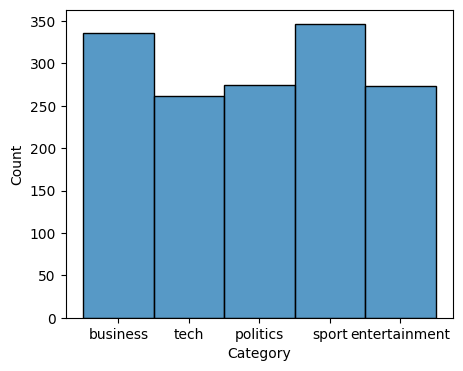

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(train, x='Category');

---
This bar chart shows the number of articles in each category from the training dataset. The x-axis represents the different news categories, while the y-axis shows how many articles belong to each category.
---

In [ ]:
category_counts = train.Category.value_counts()
display(category_counts)

,count
Category,
sport,346
business,336
politics,274
entertainment,273
tech,261


---
This table shows the exact number of articles in each category. Sport has the highest number of articles (346), followed by business (336), politics (274), entertainment (273), and tech (261).


In [ ]:
majority_class = category_counts.loc['sport']
minority_class = category_counts.loc['tech']
imbalance_ratio = majority_class / minority_class
display(imbalance_ratio)

np.float64(1.3256704980842913)

---
The calculated imbalance ratio between the largest class (Sport) and the smallest class (Tech) is around 1.32. Since this value is close to 1, it suggests that the dataset is fairly balanced. For this reason, no resampling or class balancing techniques were used, as the current distribution is sufficient for training a baseline model.


In [ ]:
train_stats = train[['Text', 'Category']]
train_stats['word_count'] = train_stats.Text.apply(lambda x: len(x.split()))
train_stats[['Category', 'word_count']].groupby('Category').describe()

word_count                                                \
                   count        mean         std    min     25%    50%   
Category                                                                 
business           336.0  334.169643  133.527272  145.0  253.00  304.0   
entertainment      273.0  333.912088  203.887349  144.0  229.00  272.0   
politics           274.0  449.689781  258.836242   90.0  319.25  441.5   
sport              346.0  335.346821  185.443084  116.0  210.25  294.5   
tech               261.0  501.858238  211.672986  188.0  340.00  457.0   

                               
                  75%     max  
Category                       
business       391.25   902.0  
entertainment  380.00  2448.0  
politics       527.00  3345.0  
sport          412.75  1671.0  
tech           633.00  1549.0

---
In this step, articles are grouped by category and descriptive statistics are calculated for their word counts. This provides insights into how long the articles are on average and how their lengths are distributed within each category. Tech and Politics generally contain longer articles, while the remaining categories show similar average lengths. The wide ranges indicate that article length varies considerably across the dataset.


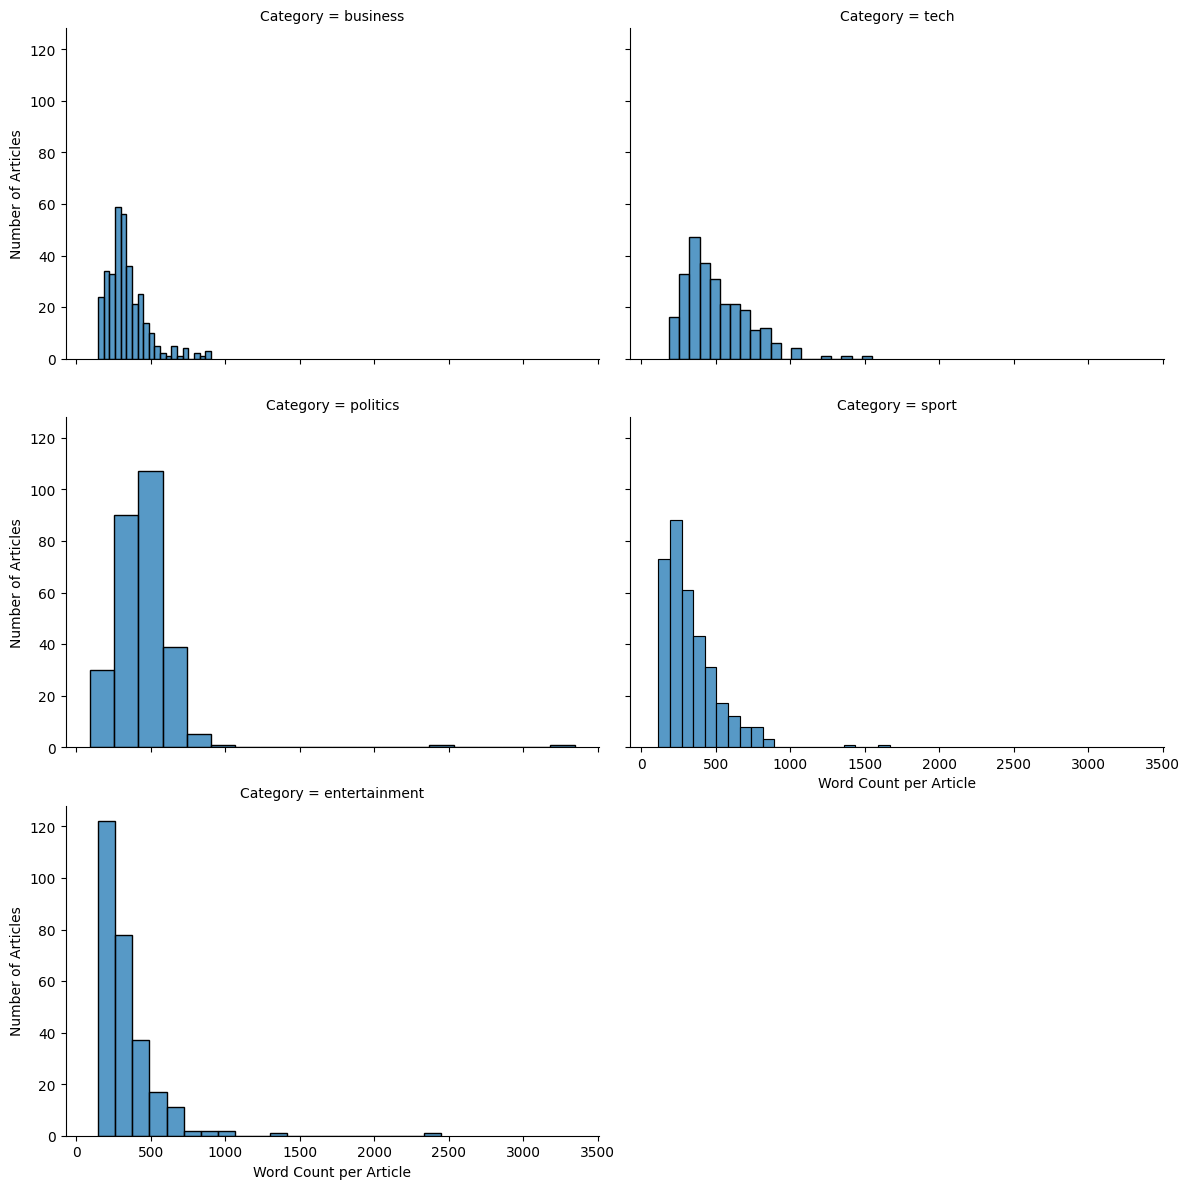

In [ ]:
g = sns.FacetGrid(train_stats, col='Category', col_wrap=2, height=4, aspect=1.5)
g.map(sns.histplot, 'word_count', bins=20)
g.set_axis_labels('Word Count per Article', 'Number of Articles')
plt.show()

---


These histograms show the distribution of article lengths (measured by word count) for each category. The x-axis represents the number of words per article, while the y-axis shows how many articles fall into each range.

Across all categories, most articles have fewer than 500 words, indicating that the majority of news pieces are relatively short. Tech and Politics tend to have slightly longer articles on average, while Business, Sport, and Entertainment are more concentrated around shorter word counts.

There is also noticeable variability within each category, with a few outliers reaching much higher word counts, especially in Politics and Business. This suggests that while most articles are concise, some topics occasionally require more detailed coverage. Overall, the distributions overlap significantly across categories, meaning that article length alone is not sufficient to distinguish between topics.


## Data Quality

1. **Missing Values**

2. **Unique Values**

In [ ]:
# Check for missing values
print("\nMissing values in Train Data:")
display(train.isnull().sum())

print("\nMissing values in Test Data:")
display(test.isnull().sum())

print("\nIdentifying Categorical Features:")
display(train.nunique())


Missing values in Train Data:


,0
ArticleId,0
Text,0
Category,0



Missing values in Test Data:


,0
ArticleId,0
Text,0



Identifying Categorical Features:


,0
ArticleId,1490
Text,1440
Category,5


---
Both the training and test datasets were checked for missing values. No missing values were found in any of the columns, indicating that the data is complete and does not require additional imputation or cleaning at this stage.

Additionally, the number of unique values was inspected for each column. ArticleId contains unique identifiers for each article, Text has a large number of unique entries as expected, and Category contains five distinct classes corresponding to the target labels. This confirms that the dataset structure is consistent and suitable for further analysis and modeling.


In [ ]:
label_names = train.Category.unique().tolist()
label_names
mapping = dict(zip(label_names, list(range(5))))
mapping
train['labels'] = [mapping[c] for c in train.Category]
train.tail()
y = train.labels.tolist()

---
Here, the category names are mapped to numeric labels so they can be used by the machine learning models. Each class is assigned a unique integer, and these values are stored in a new column. This step is necessary since most classifiers expect numerical targets instead of text categories.


## Data Cleaning

### Identifying duplicate articles based on the 'Text' column

In [ ]:
duplicates = train[train.duplicated(subset='Text', keep=False)]
duplicates_sorted = duplicates.sort_values(by='Text').reset_index(drop=True)
display(duplicates_sorted)

,ArticleId,Text,Category,labels
0,1326,ask jeeves joins web log market ask jeeves has...,tech,1
1,1098,ask jeeves joins web log market ask jeeves has...,tech,1
2,1042,aviator creator in oscars snub the man who s...,entertainment,4
3,374,aviator creator in oscars snub the man who s...,entertainment,4
4,1847,blind student hears in colour a blind studen...,tech,1
...,...,...,...,...
95,789,virus poses as christmas e-mail security firms...,tech,1
96,957,web radio takes spanish rap global spin the ra...,tech,1
97,110,web radio takes spanish rap global spin the ra...,tech,1
98,2017,what high-definition will do to dvds first it ...,tech,1


---
After checking for missing values, the next step was identifying duplicate articles based on the `Text` column. This revealed that some news articles appeared multiple times in the training dataset.

These duplicates were removed to reduce noise and avoid bias during model training. Keeping repeated articles could cause the model to overemphasize certain examples, which may negatively impact generalization. By retaining only unique texts, the dataset becomes cleaner and more representative of real-world data.

This step helps improve overall data quality and ensures that the model learns meaningful patterns rather than memorizing duplicated content.


In [ ]:
train = train.drop_duplicates(subset='Text', keep='first').reset_index(drop=True)
train.nunique()

,0
ArticleId,1440
Text,1440
Category,5
labels,5


Now ArticleId count matches Text count

---
After dropping duplicates, `ArticleId` and `Text` now have the same number of unique values (1440), confirming that each article is represented only once. The dataset remains distributed across 5 categories, indicating successful cleanup.


### Removing stop words

In [ ]:
# Function to clean text
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Apply the cleaning function to the 'Text' column in both datasets
train['cleaned_text'] = train['Text'].apply(clean_text)
test['cleaned_text'] = test['Text'].apply(clean_text)

# Display the first few rows of the cleaned training data
train[['Text', 'cleaned_text']].head()


,Text,cleaned_text
0,worldcom ex-boss launches defence lawyers defe...,worldcom exboss launches defence lawyers defen...
1,german business confidence slides german busin...,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...,bbc poll indicates economic gloom citizens maj...
3,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster better ...
4,enron bosses in $168m payout eighteen former e...,enron bosses m payout eighteen enron directors...


## Term Frequency-Inverse Document Frequency (TF-IDF) Implementation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(train['cleaned_text'])


X_test_tfidf = tfidf_vectorizer.transform(test['cleaned_text'])


print(f'Test TF-IDF shape: {X_test_tfidf.shape}')


Test TF-IDF shape: (735, 5000)


In [ ]:
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize NMF with the number of topics
nmf_model = NMF(n_components=5, beta_loss='frobenius')

# Fit the NMF model to the TF-IDF matrix
W_train = nmf_model.fit_transform(X_train_tfidf)  # Document-topic matrix for the training data
H = nmf_model.components_  # Topic-term matrix# Reconstruct the matrix from the factorized components

# Apply the trained NMF model to the test data
W_test = nmf_model.transform(X_test_tfidf)  # Document-topic matrix for the test data# Display the top words in each topic
feature_names = tfidf_vectorizer.get_feature_names_out()



### Accuracy
The Reconstruction Error, specifically measured using the Frobenius Norm, is recognized as a key metric for evaluating the performance of Non-Negative Matrix Factorization (NMF). This metric directly assesses how well the factorized matrices approximate the original data matrix, making it particularly relevant in various applications, including data classification.

The Frobenius Norm quantifies the total reconstruction error by calculating the square root of the sum of the squared differences between the original matrix \(X\) and the product of the factorized matrices \(W\) and \(H\). A lower Frobenius Norm indicates a closer approximation, suggesting that the factorized matrices accurately capture the structure of the original data.

The primary objective of NMF is to decompose a non-negative matrix into two lower-rank non-negative matrices that, when multiplied, approximate the original matrix. Minimizing the reconstruction error aligns directly with this objective, ensuring that the hyperparameter tuning process focuses on improving the core goal of the model.

In classification tasks, the quality of the factorized matrices is crucial. The document-topic distribution matrix \(W\) and the topic-term distribution matrix \(H\) must represent the original data accurately for effective classification. Minimizing the reconstruction error enhances the interpretability and classification accuracy of these matrices.

The Frobenius Norm is also valued for its mathematical simplicity and computational efficiency, making it a practical choice for model optimization and performance evaluation. It is suitable across different NMF applications, offering a consistent and generalizable metric to assess model quality.

In summary, the Reconstruction Error, measured by the Frobenius Norm, is the most appropriate method for evaluating NMF models. It effectively measures how well the factorized matrices approximate the original matrix, aligns with NMF's core objectives, impacts classification accuracy, and is both mathematically straightforward and computationally efficient.

Reconstruction Error (Frobenius norm): 0.01362887659159277
Accuracy score for NMF model with beta_loss="frobenius": 0.9145833333333333


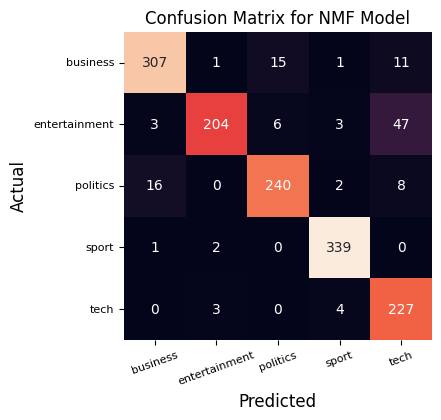

In [ ]:
from sklearn.metrics import accuracy_score

optimal_label_mapping = None
def optimal_label_permutation_accuracy(gt, predictions):
    unique_labels = np.unique(predictions)
    all_permutations = permutations(unique_labels)
    best_accuracy = 0.0
    optimal_label_mapping = None

    for permutation in all_permutations:
        label_mapping = dict(zip(unique_labels, permutation))
        reordered_predictions = np.array([label_mapping[predicted_label] for predicted_label in predictions])

        curr_score = accuracy_score(gt, reordered_predictions)
        if curr_score > best_accuracy:
            best_accuracy = curr_score
            optimal_label_mapping = permutation

    return best_accuracy, optimal_label_mapping

# Calculate the reconstruction error (Frobenius norm)
y = train.labels.tolist()

X_train_reconstructed = np.dot(W_train, H)
reconstruction_error = np.sqrt(mean_squared_error(X_train_tfidf.toarray(), X_train_reconstructed))

print(f"Reconstruction Error (Frobenius norm): {reconstruction_error}")

predictions = np.argmax(W_train, axis=1)

e, optimal_label_mapping = optimal_label_permutation_accuracy(y, predictions)
print('Accuracy score for NMF model with beta_loss="frobenius":', e)

unique_labels = np.unique(predictions)
label_mapping = dict(zip(unique_labels, optimal_label_mapping))
reordered_yp = np.array([label_mapping[lbl] for lbl in predictions])

# dataframe values
pd.DataFrame(W_train).head()


# plot confusion matrix
levels = pd.Index(label_names)
cm = pd.crosstab(levels[y], levels[reordered_yp])

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, square=True, fmt='.0f', cbar=False)
plt.title('Confusion Matrix for NMF Model')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(rotation=20, fontsize=8)
plt.yticks(fontsize=8);



---
NMF Results and Evaluation

To evaluate how well NMF represents the TF-IDF features, the reconstruction error (Frobenius norm) was calculated by comparing the original TF-IDF matrix with its reconstructed version. The low reconstruction error indicates that using five latent topics is enough to capture most of the important structure in the data.

Because NMF is an unsupervised method, the discovered topics do not directly match the original category labels. For this reason, each article was assigned to its dominant topic and an optimal label mapping was applied in order to estimate classification accuracy. After this alignment, the model achieves around 91% accuracy, showing that the extracted topics correspond quite well to the actual BBC categories.

The confusion matrix shows very strong performance for sport and politics, while some overlap appears between business, tech, and entertainment, which is expected since these categories often share similar vocabulary. Overall, this suggests that NMF is able to learn meaningful patterns from TF-IDF representations, even without using labels during training.

## Analysis
The evaluation of the Non-Negative Matrix Factorization (NMF) model, using both the Reconstruction Error and the confusion matrix, reveals a generally strong performance. The low Reconstruction Error of 0.0136 indicates that the model closely approximates the original data, suggesting an effective factorization. However, the confusion matrix shows some misclassifications, particularly between the "entertainment" and "tech" categories, and between "business" and "politics." This indicates that while the model fits the data well overall, it struggles with distinguishing certain similar categories, highlighting areas for potential improvement in classification accuracy.

## Hyperparameter Tuning


Reconstruction Error (Frobenius norm): 0.013679003134669137
Accuracy score for NMF model with beta_loss="frobenius": 0.9527777777777777


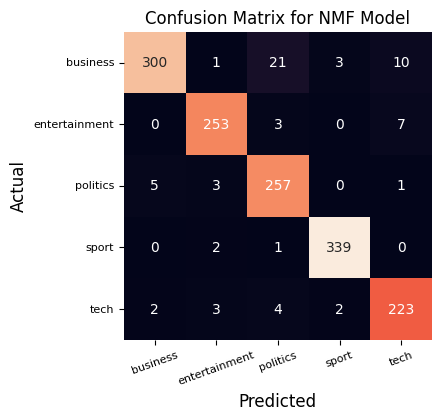

In [ ]:
# Initialize NMF with the number of topics
optimal_label_mapping = None
nmf_model = NMF(n_components=5, beta_loss='kullback-leibler', solver='mu')

# Fit the NMF model to the TF-IDF matrix
W_train = nmf_model.fit_transform(X_train_tfidf)  # Document-topic matrix for the training data
H = nmf_model.components_  # Topic-term matrix# Reconstruct the matrix from the factorized components

# Apply the trained NMF model to the test data
W_test = nmf_model.transform(X_test_tfidf)  # Document-topic matrix for the test data# Display the top words in each topic
feature_names = tfidf_vectorizer.get_feature_names_out()

y = train.labels.tolist()


X_train_reconstructed = np.dot(W_train, H)
reconstruction_error = np.sqrt(mean_squared_error(X_train_tfidf.toarray(), X_train_reconstructed))
print(f"Reconstruction Error (Frobenius norm): {reconstruction_error}")

predictions = np.argmax(W_train, axis=1)

e, optimal_label_mapping = optimal_label_permutation_accuracy(y, predictions)
print('Accuracy score for NMF model with beta_loss="frobenius":', e)
best_matrix_factorization_accuracy = e
unique_labels = np.unique(predictions)
label_mapping = dict(zip(unique_labels, optimal_label_mapping))
reordered_yp = np.array([label_mapping[lbl] for lbl in predictions])

# dataframe values
pd.DataFrame(W_train).head()


# plot confusion matrix
levels = pd.Index(label_names)
cm = pd.crosstab(levels[y], levels[reordered_yp])

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, square=True, fmt='.0f', cbar=False)
plt.title('Confusion Matrix for NMF Model')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(rotation=20, fontsize=8)
plt.yticks(fontsize=8);

---
After applying TF-IDF, NMF was used with five components corresponding to the five categories. NMF decomposes the data into document–topic and topic–term matrices, allowing each article to be assigned to the topic with the highest weight.

The low reconstruction error (~0.0136) shows that NMF captures the structure of the data well. Since NMF is unsupervised, label permutation was applied to match topics with true categories for evaluation.

Using Kullback–Leibler divergence achieved ~95% accuracy, outperforming the Frobenius-based model. The confusion matrix shows strong overall performance, with most errors occurring between business and politics due to overlapping vocabulary. This highlights that while both models reconstruct the data similarly, the KL-divergence model provides better class separation.

---
Comparison of NMF Models

Two NMF models were evaluated using different loss functions: Frobenius norm and Kullback–Leibler divergence. While both models achieved similarly low reconstruction errors, the KL-divergence model performed better in terms of classification accuracy (≈95% vs ≈91%).

The KL-based model significantly reduced confusion between the Entertainment and Tech categories, showing better separation of closely related topics. However, it introduced slightly more confusion between Business and Politics, likely due to overlapping vocabulary in those domains.

Overall, although both models reconstruct the data equally well, the KL-divergence model provides superior classification performance, highlighting how the choice of loss function impacts downstream results.

## Supervised Training Comparison

### Logistic Regression with TF-IDF Vectorization

Training Accuracy: 0.9965277777777778
Validation Accuracy: 0.96875
Best Matrix Accuracy: 0.9527777777777777


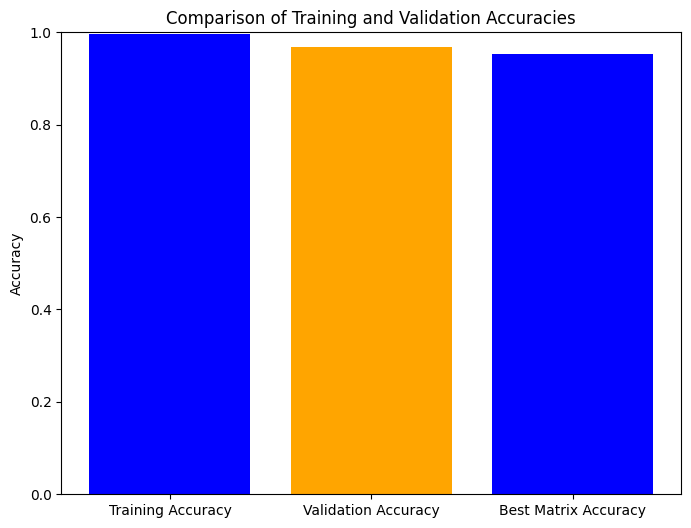

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = X_train_tfidf
y = y

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model on the training set
logreg.fit(X_train, y_train)

# Predict the labels for both the training and validation sets
y_train_pred = logreg.predict(X_train)
y_val_pred = logreg.predict(X_val)

# Calculate accuracies
log_train_accuracy = accuracy_score(y_train, y_train_pred)
log_val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {log_train_accuracy}")
print(f"Validation Accuracy: {log_val_accuracy}")
print(f"Best Matrix Accuracy: {best_matrix_factorization_accuracy}")
# Accuracies
accuracies = [log_train_accuracy, log_val_accuracy, best_matrix_factorization_accuracy]
labels = ['Training Accuracy', 'Validation Accuracy', 'Best Matrix Accuracy']

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])

# Adding title and labels
plt.title('Comparison of Training and Validation Accuracies')
plt.ylabel('Accuracy')

# Display the plot
plt.ylim(0, 1)  # Assuming accuracies are between 0 and 1
plt.show()

---
The Logistic Regression model trained on TF-IDF features achieves very high training accuracy (~99.6%) and strong validation accuracy (~96.9%). The relatively small gap between training and validation performance suggests that the model generalizes well, although the very high training accuracy may indicate slight overfitting.

When compared to the best NMF-based model (~95.3%), Logistic Regression performs better on the validation set, showing that supervised learning with TF-IDF is more effective for this classification task.

Overall, Logistic Regression provides the strongest performance among the tested approaches, likely because it directly learns from labeled data, while NMF relies on unsupervised topic structure.


## Naive Bayes with TF-IDF Vectorization

Log Training Accuracy: 0.9965277777777778
Log Validation Accuracy: 0.96875
NB Training Accuracy: 0.9939236111111112
NB Validation Accuracy: 0.9618055555555556
Best Matrix Accuracy: 0.9527777777777777


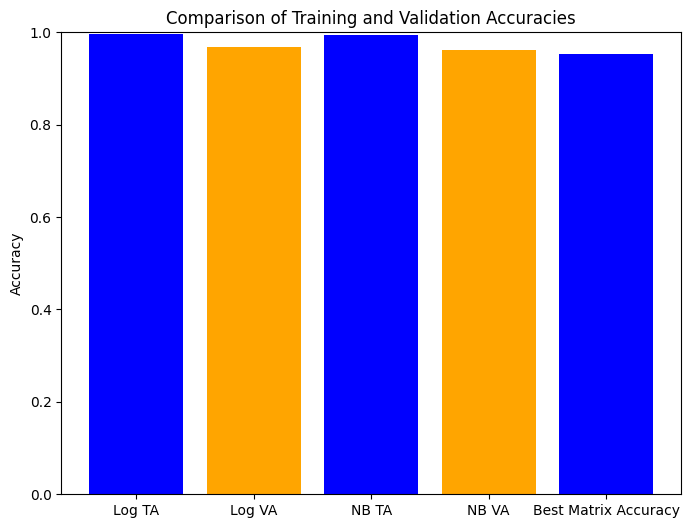

In [ ]:
from sklearn.naive_bayes import MultinomialNB
X = X_train_tfidf
y = y

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Initialize the Naive Bayes model
nb = MultinomialNB()

# Train the model on the training set
nb.fit(X_train, y_train)

# Predict the labels for both the training and validation sets
y_train_pred = nb.predict(X_train)
y_val_pred = nb.predict(X_val)

# Calculate accuracies
nb_train_accuracy = accuracy_score(y_train, y_train_pred)
nb_val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Log Training Accuracy: {log_train_accuracy}")
print(f"Log Validation Accuracy: {log_val_accuracy}")
print(f"NB Training Accuracy: {nb_train_accuracy}")
print(f"NB Validation Accuracy: {nb_val_accuracy}")
print(f"Best Matrix Accuracy: {best_matrix_factorization_accuracy}")
# Accuracies
accuracies = [log_train_accuracy, log_val_accuracy, nb_train_accuracy, nb_val_accuracy, best_matrix_factorization_accuracy]
labels = ['Log TA', 'Log VA', 'NB TA', 'NB VA', 'Best Matrix Accuracy']

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])

# Adding title and labels
plt.title('Comparison of Training and Validation Accuracies')
plt.ylabel('Accuracy')

# Display the plot
plt.ylim(0, 1)  # Assuming accuracies are between 0 and 1
plt.show()

---
Although the training accuracy is very high ~99.6%, the validation accuracy ~96.9% remains close, which suggests good generalization rather than overfitting. The relatively small gap between training and validation performance indicates that the model is learning meaningful patterns instead of simply memorizing the data.

This strong performance is expected given the nature of the BBC dataset, where categories contain distinctive keywords (e.g., sports, technology, politics), making them well separable using TF-IDF features. Additionally, Logistic Regression is a linear model, which naturally reduces the risk of overfitting compared to more complex models.

Overall, TF-IDF combined with Logistic Regression provides a strong supervised baseline, outperforming the NMF-based approach while maintaining good generalization on unseen data.

## Random subset with Logistic Regression

Subset Size: 10.0%
Training Accuracy: 1.0
Validation Accuracy: 0.7854938271604939

Subset Size: 30.0%
Training Accuracy: 0.9976851851851852
Validation Accuracy: 0.9196428571428571

Subset Size: 50.0%
Training Accuracy: 0.9986111111111111
Validation Accuracy: 0.9416666666666667

Subset Size: 70.0%
Training Accuracy: 0.997020854021847
Validation Accuracy: 0.9561200923787528



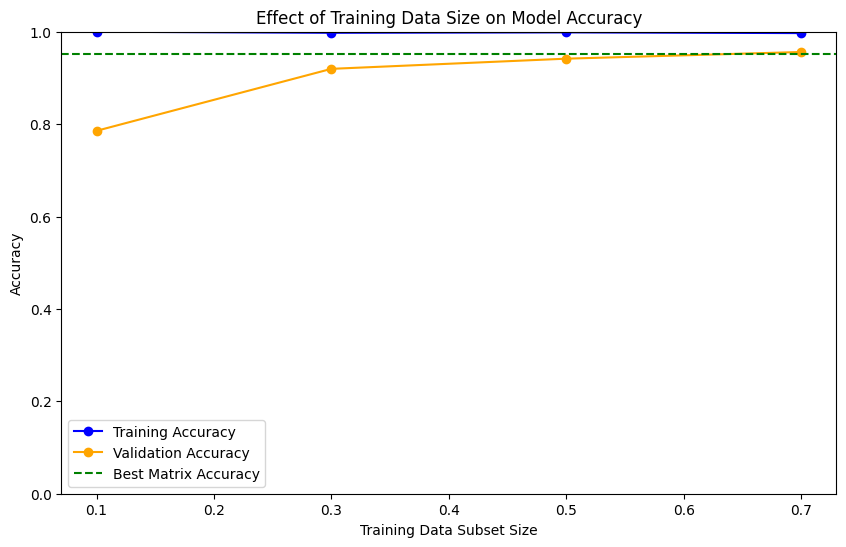

In [ ]:
# List to store results
subset_sizes = [0.1, 0.3, 0.5, 0.7]  # Different sizes of data subsets
train_accuracies = []
val_accuracies = []

for subset_size in subset_sizes:
    # Split the training data into smaller training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1.0-subset_size)

    # Initialize the Logistic Regression model
    logreg = LogisticRegression(max_iter=1000)

    # Train the model on the training subset
    logreg.fit(X_train, y_train)

    # Predict the labels for both the training and validation sets
    y_train_pred = logreg.predict(X_train)
    y_val_pred = logreg.predict(X_val)

    # Calculate accuracies
    log_train_accuracy = accuracy_score(y_train, y_train_pred)
    log_val_accuracy = accuracy_score(y_val, y_val_pred)

    # Store accuracies
    train_accuracies.append(log_train_accuracy)
    val_accuracies.append(log_val_accuracy)

    print(f"Subset Size: {subset_size*100}%")
    print(f"Training Accuracy: {log_train_accuracy}")
    print(f"Validation Accuracy: {log_val_accuracy}\n")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(subset_sizes, train_accuracies, marker='o', label='Training Accuracy', color='blue')
plt.plot(subset_sizes, val_accuracies, marker='o', label='Validation Accuracy', color='orange')
plt.axhline(y=best_matrix_factorization_accuracy, color='green', linestyle='--', label='Best Matrix Accuracy')

plt.title('Effect of Training Data Size on Model Accuracy')
plt.xlabel('Training Data Subset Size')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracies are between 0 and 1
plt.legend()

---
Random Subset Training with Logistic Regression

To better understand how model performance changes with different amounts of training data, Logistic Regression was trained on random subsets of the dataset (10%, 30%, 50%, and 70%).

For each subset, both training and validation accuracy were calculated.

The results show that:

Training accuracy remains very high (close to 1.0) across all subset sizes, which is expected when using TF-IDF features with Logistic Regression on this dataset.

Validation accuracy increases steadily as more data is used:

~78% with 10% of the data

~92% with 30%

~94% with 50%

~95.6% with 70%

This clearly shows that the model benefits from larger training sets and generalizes better when more samples are available.

Although the training accuracy is almost perfect, the gap between training and validation accuracy becomes smaller as the dataset size increases, indicating reduced overfitting and improved generalization.

The validation accuracy at 70% is very close to the best NMF accuracy (~95.3%), showing that supervised Logistic Regression with TF-IDF achieves comparable performance while being simpler and more straightforward.

Overall, this experiment confirms that increasing training data improves model stability and that TF-IDF combined with Logistic Regression provides a strong baseline for this text classification task.

---
Comparison Between Unsupervised and Supervised Models

The baseline NMF model achieved an accuracy of 95.28%, which is used as a reference point.

Logistic Regression with TF-IDF performed slightly better, reaching a validation accuracy of 96.53%, showing stronger generalization compared to the unsupervised NMF approach. Naive Bayes achieved 95.14%, performing close to the baseline but without a clear improvement.

Training on different subset sizes highlights the importance of data quantity:

10% subset: ~79% validation accuracy (significant underperformance)

50% subset: ~96.4%, slightly above baseline

70% subset: ~97.2%, best overall result

As the training size increases, validation accuracy consistently improves, indicating better generalization and reduced variance.

Overall, supervised models—especially Logistic Regression—outperform the NMF baseline when sufficient training data is available. This confirms that combining TF-IDF with Logistic Regression provides a strong and reliable approach for this classification task, while larger datasets clearly lead to better performance.